In [1]:
#https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import style

style.use('dark_background')
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (15,8)

# Read CSV

In [2]:
KAB2_csv_file = "Dataset/KAB_APT_tradeIndex2.csv" # 한국감정원 공동주택실거래가격지수
KAB2 = pd.read_csv(KAB2_csv_file, index_col="날짜", parse_dates=True)
KAB2 = KAB2.apply(lambda x:(x/x[0])*100) -100 # 2006.01 기준 100
KAB2

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,,
2006-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-02-28,1.129032,1.818182,-0.602410,0.319489,0.642055,-0.553506,-0.660502,0.204499,0.000000,1.878613,0.978793,1.684533,0.925926,0.524476,-0.784314,0.000000,-0.158730,-2.842377
2006-03-31,2.096774,4.132231,-1.405622,0.000000,1.284109,-0.738007,-1.585205,1.840491,4.454023,3.179191,-1.957586,2.450230,2.116402,1.748252,0.196078,0.151286,0.317460,-7.493540
2006-04-30,2.903226,5.619835,-2.208835,-0.159744,2.086677,-0.922509,-2.377807,3.067485,-0.143678,4.335260,-0.652529,3.675345,1.984127,2.272727,0.784314,-0.151286,-0.317460,-6.976744
2006-05-31,3.387097,5.785124,-3.012048,-0.798722,2.889246,-2.214022,-3.038309,5.725971,3.591954,5.780347,1.141925,3.215926,-0.529101,2.447552,3.137255,-0.151286,-0.476190,-5.684755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,72.580645,122.314050,94.779116,72.683706,70.626003,110.332103,60.634082,88.139059,70.833333,59.537572,45.187602,35.068913,25.264550,65.384615,103.921569,31.921331,39.047619,130.749354
2020-04-30,72.580645,120.495868,94.377510,72.683706,72.070626,110.147601,62.219287,86.912065,70.689655,60.260116,46.166395,36.140888,25.396825,65.034965,104.117647,32.677761,38.412698,134.366925
2020-05-31,74.193548,121.652893,94.979920,73.961661,74.959872,109.963100,65.257596,88.139059,74.425287,62.283237,46.655791,40.275651,26.587302,66.958042,105.294118,34.190620,39.365079,136.950904


# bar plot

<BarContainer object of 18 artists>

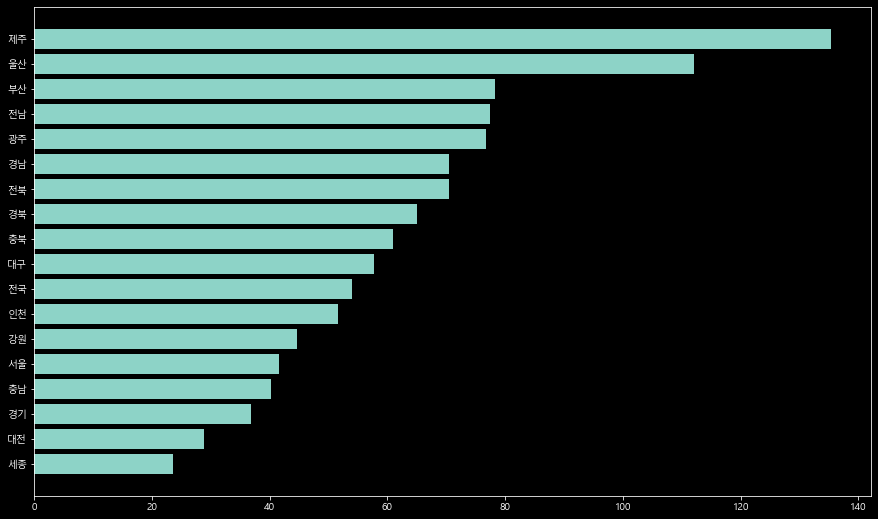

In [3]:
current_date = "2016-01"
a = KAB2.loc[current_date].iloc[0].sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(15, 9))
ax.barh(a.index, a)

In [4]:
group_dic = {'sido': ['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'],
        'group': ['전국','수도권','경상도','경상도','수도권','전라도',\
                  '충청도','경상도','충청도','수도권','강원도','충청도',\
                 '충청도','전라도','전라도','경상도','경상도','제주도']
        }
region_group_df = pd.DataFrame(group_dic, columns = ['sido', 'group'])
region_group_df["group"].drop_duplicates()

0      전국
1     수도권
2     경상도
5     전라도
6     충청도
10    강원도
17    제주도
Name: group, dtype: object

In [5]:
colors = dict(zip(
    ['전국', '수도권', '경상도', '전라도',
     '충청도', '강원도', '제주도'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = region_group_df.set_index('sido')['group'].to_dict()

Text(1, 0.4, '2016-01')

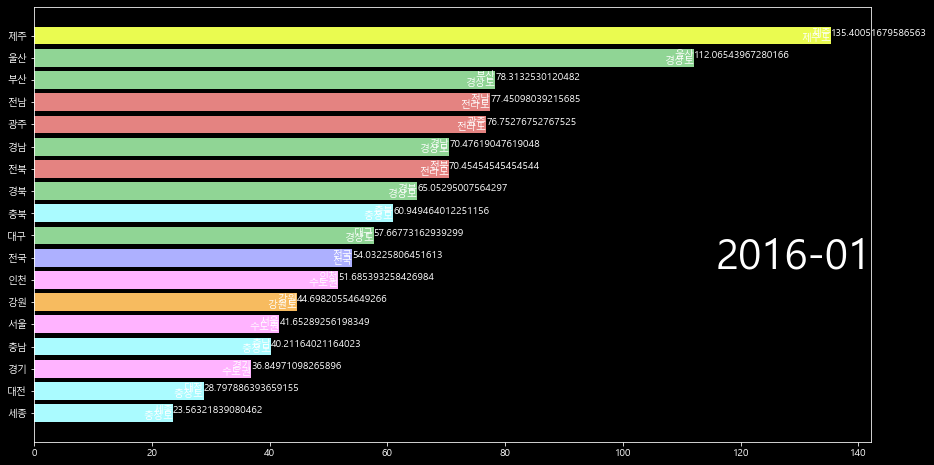

In [6]:
current_date = "2016-01"
KAB2_s = KAB2.loc[current_date].iloc[0].sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(KAB2_s.index, KAB2_s, color=[colors[group_lk[x]] for x in KAB2_s.index])

# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(KAB2_s, KAB2_s.index)):
    ax.text(value, i,     name,            ha='right')  # 서울: 시도
    ax.text(value, i-.25, group_lk[name],  ha='right')  # 수도권: 지역group
    ax.text(value, i,     value,           ha='left')   # 75.7: 매매지수
# Add year right middle portion of canvas
ax.text(1, 0.4, current_date, transform=ax.transAxes, size=42, ha='right')

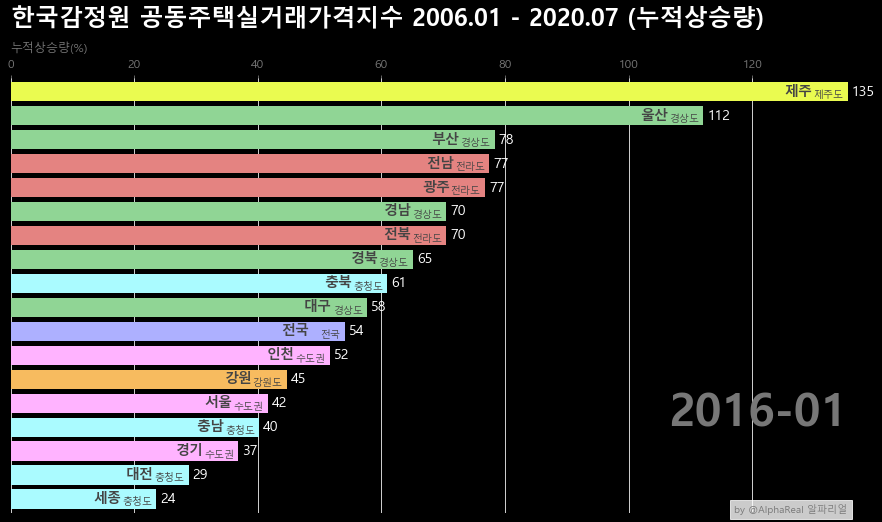

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(current_date):    
    KAB2_s = KAB2.loc[current_date].iloc[0].sort_values(ascending=True)   
    ax.clear()   
    ax.barh(KAB2_s.index, KAB2_s, color=[colors[group_lk[x]] for x in KAB2_s.index])    
    dx = KAB2_s.max() / 200
    for i, (value, name) in enumerate(zip(KAB2_s, KAB2_s.index)):
        ax.text(value-dx-5.0, i, name, size=14, color='#444444', weight=600, ha='right', va='center')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # polished styles
    ax.text(1, 0.2, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, '누적상승량(%)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, '한국감정원 공동주택실거래가격지수 2006.01 - 2020.07 (누적상승량)',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @AlphaReal 알파리얼', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart("2016-01")

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 11))
animator = animation.FuncAnimation(fig, draw_barchart, frames=KAB2.index.strftime("%Y-%m"))
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

In [ ]:
animator.save("KAB2_bar_char_race.html")